In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [3]:
from sklearn import metrics

In [4]:
import statsmodels.api as sm

In [5]:
def logistic(t):
    return 1.0 / (1 + math.exp(-1.0*t))

In [10]:
t = np.linspace(-10, 10, 500)

In [11]:
y = np.array([logistic(ele) for ele in t])

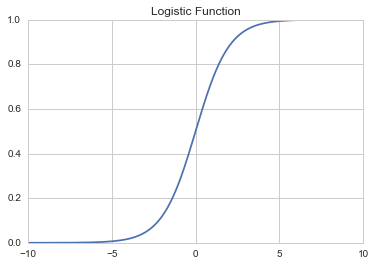

In [12]:
plt.plot(t, y)
plt.title('Logistic Function')

In [13]:
df = sm.datasets.fair.load_pandas().data

In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [15]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [16]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [17]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


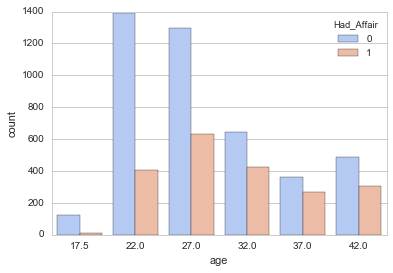

In [21]:
sns.countplot('age', data=df.sort('age'), hue='Had_Affair', palette='coolwarm')

/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


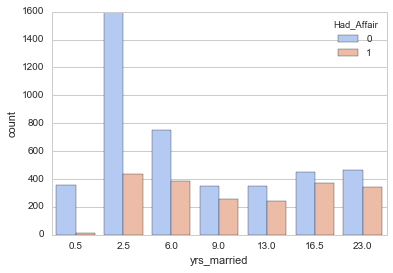

In [23]:
sns.countplot('yrs_married', data=df.sort('yrs_married'), hue='Had_Affair', palette='coolwarm')

/Users/nakanoken/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


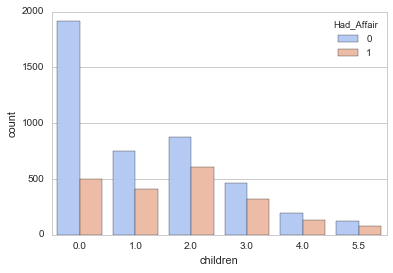

In [26]:
sns.countplot('children', data=df.sort('children'), hue='Had_Affair', palette='coolwarm')

In [27]:
acc_dummies = pd.get_dummies(df['occupation'])

In [28]:
hus_acc_dummies = pd.get_dummies(df['occupation_husb'])

In [29]:
acc_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
acc_dummies.columns = ['acc1','acc2','acc3','acc4','acc5','acc6']
hus_acc_dummies.columns = ['hacc1','hacc2','hacc3','hacc4','hacc5','hacc6']

In [31]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [33]:
dummies = pd.concat([acc_dummies, hus_acc_dummies], axis=1)

In [34]:
X = pd.concat([X, dummies], axis=1)

In [35]:
Y = df['Had_Affair']

In [36]:
X = X.drop('acc1', axis=1)
X = X.drop('hacc1', axis=1)

In [37]:
X = X.drop('affairs', axis=1)

In [38]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,acc2,acc3,acc4,acc5,acc6,hacc2,hacc3,hacc4,hacc5,hacc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
Y = np.ravel(Y)

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
log_model.score(X, Y)

0.72588752748978946

In [47]:
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T

In [48]:
coeff_df

,0,1
0,rate_marriage,-0.697846
1,age,-0.0563363
2,yrs_married,0.103893
3,children,0.0181853
4,religious,-0.368507
5,educ,0.00864737
6,acc2,0.298119
7,acc3,0.60815
8,acc4,0.346511
9,acc5,0.94226


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [55]:
log_model2 = LogisticRegression()

In [57]:
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
class_predict = log_model2.predict(X_test)

In [53]:
class_predict

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
metrics.accuracy_score(Y_test, class_predict)

0.70979899497487442